In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import chi2_contingency


#https://www.kaggle.com/datasets/adilshamim8/student-performance-on-an-entrance-examination/data

#This dataset contains comprehensive information regarding candidates' performance in a common entrance examination, alongside various demographic and academic indicators. It is designed to support analysis into the factors influencing success in competitive exams and can serve as a valuable resource for educational researchers and data scientists.

#Key Features:

#Examination Performance: Data reflecting the candidate’s results in the entrance examination.

#Candidate Demographics:
#Sex: Gender of the candidate.

#Caste: Caste classification of the candidate.
    #General – Represents the "General" category, which includes individuals who do not fall under the reserved categories.
    #OBC – Other Backward Classes – Represents socially and educationally disadvantaged groups that qualify for affirmative action.
    #SC – Scheduled Castes – Represents historically disadvantaged communities that have been provided with certain constitutional protections and reservations.
    #ST – Scheduled Tribes – Represents indigenous communities that have been recognized as socially and economically disadvantaged, also eligible for reservations and protections.

#Coaching Details -Information on whether the candidate attended coaching classes within Assam, outside Assam, or did not attend any coaching.
    #NO: No Coaching
    #OA: Coaching Outside Assam
    #WA: With Assam
    
#Educational Background:
#Board Details: Names of the boards where the candidate studied during Class X and Class XII.
    #CBSE – Central Board of Secondary Education – A national-level board of education in India that is widely recognized.
    #OTHERS – Likely refers to other state or national education boards not specifically listed.
    #SEBA – Board of Secondary Education, Assam – A state-level education board in Assam, India, which conducts the Class 10 (HSLC) exams.
    
#Medium of Instruction: The medium used for teaching during Class XII.
#Academic Performance:
    #AHSEC – Assam Higher Secondary Education Council – The state education board for Class 12 in Assam, responsible for conducting the Higher Secondary (HS) exams.
    #CBSE – Central Board of Secondary Education – A national-level education board conducting Class 12 exams across India.
    #OTHERS – Likely refers to other state or national education boards not specifically listed (e.g., ICSE, other state boards).
    
#Class X Percentage: Marks secured at the Class X level.
#Class XII Percentage: Marks secured at the Class XII level.
#Parental Occupation:
#Occupation details for both the candidate's father and mother, which can help analyze socioeconomic influences on performance.

In [4]:
#print(os.listdir())
data = pd.read_csv('Capstone2/Student_Performance_on_an_Entrance_Examination.csv')
print(data.head())

  Gender    Caste coaching Class_ten_education twelve_education   medium  \
0   male  General       NO                SEBA            AHSEC  ENGLISH   
1   male      OBC       WA                SEBA            AHSEC   OTHERS   
2   male      OBC       OA              OTHERS             CBSE  ENGLISH   
3   male  General       WA                SEBA            AHSEC   OTHERS   
4   male  General       OA                SEBA             CBSE  ENGLISH   

  Class_X_Percentage Class_XII_Percentage Father_occupation Mother_occupation  \
0          Excellent            Excellent            DOCTOR            OTHERS   
1          Excellent            Excellent    SCHOOL_TEACHER        HOUSE_WIFE   
2          Excellent            Excellent          BUSINESS        HOUSE_WIFE   
3          Excellent            Excellent    SCHOOL_TEACHER    SCHOOL_TEACHER   
4          Excellent            Excellent   COLLEGE_TEACHER        HOUSE_WIFE   

  time Performance  
0  ONE   Excellent  
1  TWO   Excel

In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666 entries, 0 to 665
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Gender                666 non-null    object
 1   Caste                 666 non-null    object
 2   coaching              666 non-null    object
 3   Class_ten_education   666 non-null    object
 4   twelve_education      666 non-null    object
 5   medium                666 non-null    object
 6   Class_X_Percentage    666 non-null    object
 7   Class_XII_Percentage  666 non-null    object
 8   Father_occupation     666 non-null    object
 9   Mother_occupation     666 non-null    object
 10  time                  666 non-null    object
 11  Performance           666 non-null    object
dtypes: object(12)
memory usage: 62.6+ KB
None


In [6]:
GenderVals = data['Gender'].unique()
for column in data.columns:
    print(f"\nUnique value counts in '{column}':")
    print(data[column].value_counts(dropna=False))


Unique value counts in 'Gender':
Gender
male      355
female    311
Name: count, dtype: int64

Unique value counts in 'Caste':
Caste
General    329
OBC        162
ST         108
SC          67
Name: count, dtype: int64

Unique value counts in 'coaching':
coaching
WA    449
NO    150
OA     67
Name: count, dtype: int64

Unique value counts in 'Class_ten_education':
Class_ten_education
SEBA      396
CBSE      249
OTHERS     21
Name: count, dtype: int64

Unique value counts in 'twelve_education':
twelve_education
AHSEC     368
CBSE      290
OTHERS      8
Name: count, dtype: int64

Unique value counts in 'medium':
medium
ENGLISH     536
OTHERS       74
ASSAMESE     56
Name: count, dtype: int64

Unique value counts in 'Class_X_Percentage':
Class_X_Percentage
Excellent    511
Vg           101
Good          41
Average       13
Name: count, dtype: int64

Unique value counts in 'Class_XII_Percentage':
Class_XII_Percentage
Excellent    398
Vg           181
Good          75
Average       12
Name

In [7]:
print(data.head())

  Gender    Caste coaching Class_ten_education twelve_education   medium  \
0   male  General       NO                SEBA            AHSEC  ENGLISH   
1   male      OBC       WA                SEBA            AHSEC   OTHERS   
2   male      OBC       OA              OTHERS             CBSE  ENGLISH   
3   male  General       WA                SEBA            AHSEC   OTHERS   
4   male  General       OA                SEBA             CBSE  ENGLISH   

  Class_X_Percentage Class_XII_Percentage Father_occupation Mother_occupation  \
0          Excellent            Excellent            DOCTOR            OTHERS   
1          Excellent            Excellent    SCHOOL_TEACHER        HOUSE_WIFE   
2          Excellent            Excellent          BUSINESS        HOUSE_WIFE   
3          Excellent            Excellent    SCHOOL_TEACHER    SCHOOL_TEACHER   
4          Excellent            Excellent   COLLEGE_TEACHER        HOUSE_WIFE   

  time Performance  
0  ONE   Excellent  
1  TWO   Excel

In [8]:
missing = pd.concat([data.isnull().sum(), 100 * data.isnull().mean()], axis=1)
missing.columns=['count', '%']                  #label the two columns
missing.sort_values(by='count', ascending=False)

,count,%
Gender,0,0.0
Caste,0,0.0
coaching,0,0.0
Class_ten_education,0,0.0
twelve_education,0,0.0
medium,0,0.0
Class_X_Percentage,0,0.0
Class_XII_Percentage,0,0.0
Father_occupation,0,0.0
Mother_occupation,0,0.0


In [9]:
data.select_dtypes('object')

,Gender,Caste,coaching,Class_ten_education,twelve_education,medium,Class_X_Percentage,Class_XII_Percentage,Father_occupation,Mother_occupation,time,Performance
0,male,General,NO,SEBA,AHSEC,ENGLISH,Excellent,Excellent,DOCTOR,OTHERS,ONE,Excellent
1,male,OBC,WA,SEBA,AHSEC,OTHERS,Excellent,Excellent,SCHOOL_TEACHER,HOUSE_WIFE,TWO,Excellent
2,male,OBC,OA,OTHERS,CBSE,ENGLISH,Excellent,Excellent,BUSINESS,HOUSE_WIFE,TWO,Excellent
3,male,General,WA,SEBA,AHSEC,OTHERS,Excellent,Excellent,SCHOOL_TEACHER,SCHOOL_TEACHER,ONE,Excellent
4,male,General,OA,SEBA,CBSE,ENGLISH,Excellent,Excellent,COLLEGE_TEACHER,HOUSE_WIFE,TWO,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...
661,female,ST,WA,SEBA,AHSEC,ENGLISH,Good,Vg,OTHERS,HOUSE_WIFE,ONE,Average
662,male,ST,WA,SEBA,AHSEC,ENGLISH,Vg,Good,CULTIVATOR,HOUSE_WIFE,THREE,Average
663,male,ST,WA,SEBA,CBSE,ENGLISH,Good,Vg,OTHERS,SCHOOL_TEACHER,TWO,Average
664,male,ST,WA,SEBA,AHSEC,ENGLISH,Good,Good,SCHOOL_TEACHER,HOUSE_WIFE,THREE,Average


<Axes: title={'center': 'Performance'}, ylabel='Performance'>

<Figure size 640x480 with 0 Axes>

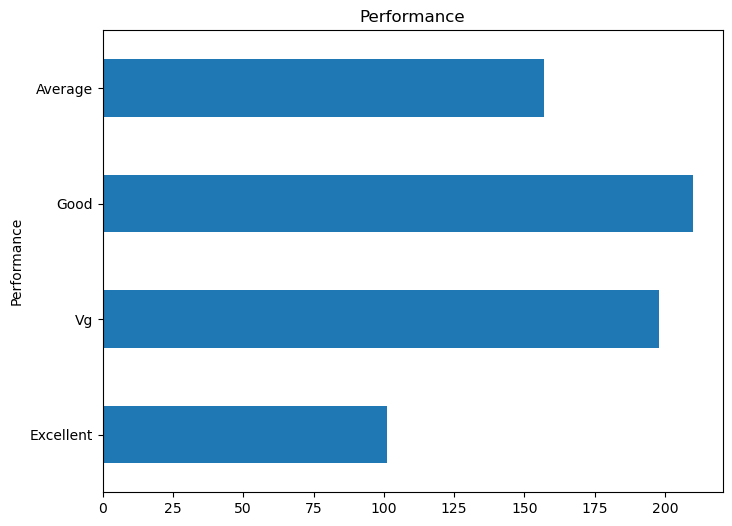

In [15]:
plt.clf()
custom_order = ['Excellent', 'Vg', 'Good', 'Average']

fig, ax = plt.subplots(figsize=(8, 6))  # Create a single plot
data.Performance.value_counts().reindex(custom_order).plot(kind='barh', ax=ax)
ax.set_title('Performance')
ax.set_xlabel('Count')

data.Performance.value_counts().reindex(custom_order).plot(kind='barh', ax=ax)

In [79]:
custom_order_map = {'Average': 1, 'Good': 2, 'Vg': 3, 'Excellent': 4}
data['Performance_map'] = data['Performance'].map(custom_order_map)


In [80]:
print(data)

     Gender    Caste coaching Class_ten_education twelve_education   medium  \
0      male  General       NO                SEBA            AHSEC  ENGLISH   
1      male      OBC       WA                SEBA            AHSEC   OTHERS   
2      male      OBC       OA              OTHERS             CBSE  ENGLISH   
3      male  General       WA                SEBA            AHSEC   OTHERS   
4      male  General       OA                SEBA             CBSE  ENGLISH   
..      ...      ...      ...                 ...              ...      ...   
661  female       ST       WA                SEBA            AHSEC  ENGLISH   
662    male       ST       WA                SEBA            AHSEC  ENGLISH   
663    male       ST       WA                SEBA             CBSE  ENGLISH   
664    male       ST       WA                SEBA            AHSEC  ENGLISH   
665  female       ST       NO                SEBA             CBSE  ENGLISH   

    Class_X_Percentage Class_XII_Percentage Father_

In [81]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666 entries, 0 to 665
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Gender                666 non-null    object
 1   Caste                 666 non-null    object
 2   coaching              666 non-null    object
 3   Class_ten_education   666 non-null    object
 4   twelve_education      666 non-null    object
 5   medium                666 non-null    object
 6   Class_X_Percentage    666 non-null    object
 7   Class_XII_Percentage  666 non-null    object
 8   Father_occupation     666 non-null    object
 9   Mother_occupation     666 non-null    object
 10  time                  666 non-null    object
 11  Performance           666 non-null    object
 12  Performance_map       666 non-null    int64 
dtypes: int64(1), object(12)
memory usage: 67.8+ KB
None


In [82]:
print(data['Performance_map'].value_counts())

Performance_map
2    210
3    198
1    157
4    101
Name: count, dtype: int64


In [83]:
print(data['Performance'].value_counts())

Performance
Good         210
Vg           198
Average      157
Excellent    101
Name: count, dtype: int64


Distribution of Gender for Performance_map = 4:
Gender
male      0.633663
female    0.366337
Name: proportion, dtype: float64

Distribution of Gender for Performance_map = 1:
Gender
male      0.509554
female    0.490446
Name: proportion, dtype: float64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


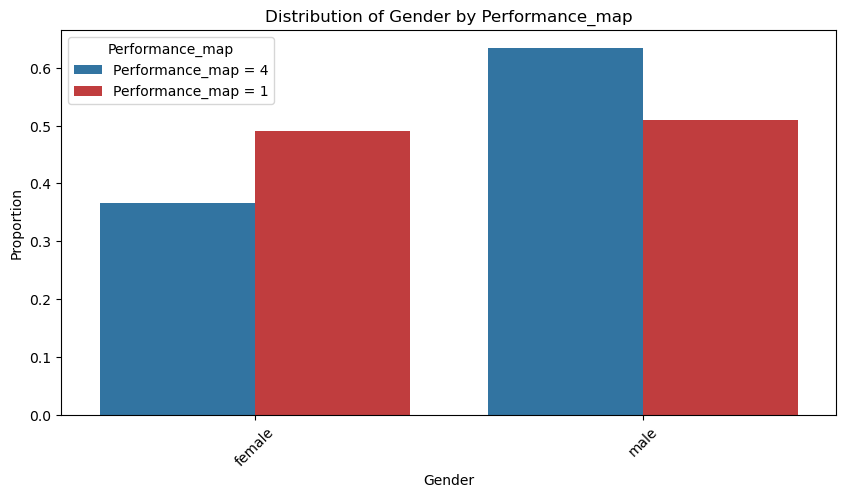

Distribution of Caste for Performance_map = 4:
Caste
General    0.821782
OBC        0.148515
SC         0.029703
Name: proportion, dtype: float64

Distribution of Caste for Performance_map = 1:
Caste
ST     0.643312
SC     0.197452
OBC    0.159236
Name: proportion, dtype: float64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


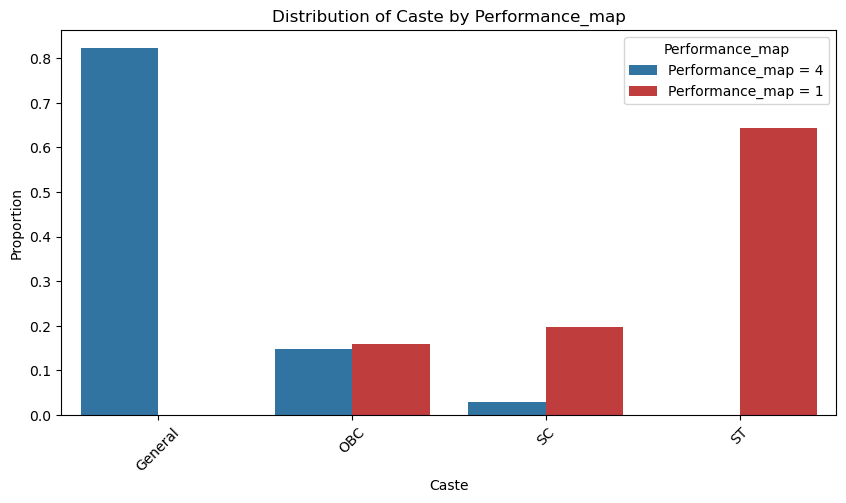

Distribution of coaching for Performance_map = 4:
coaching
WA    0.564356
OA    0.237624
NO    0.198020
Name: proportion, dtype: float64

Distribution of coaching for Performance_map = 1:
coaching
WA    0.687898
NO    0.254777
OA    0.057325
Name: proportion, dtype: float64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


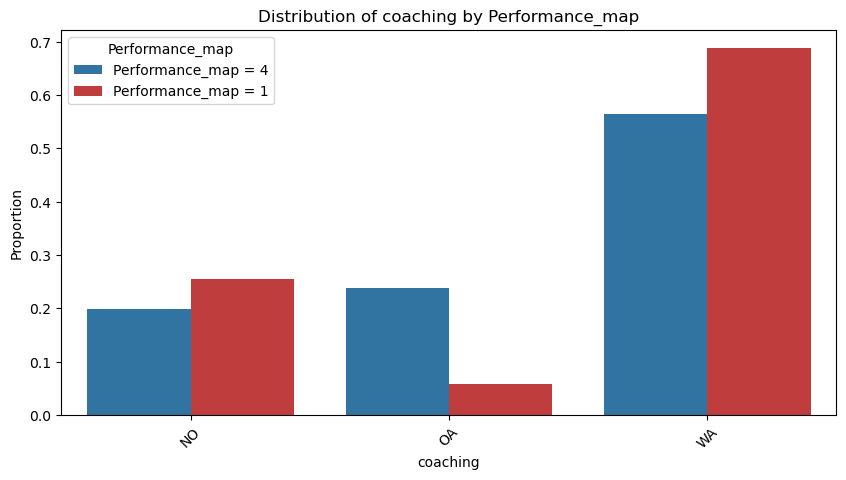

Distribution of Class_ten_education for Performance_map = 4:
Class_ten_education
SEBA      0.524752
CBSE      0.396040
OTHERS    0.079208
Name: proportion, dtype: float64

Distribution of Class_ten_education for Performance_map = 1:
Class_ten_education
SEBA      0.649682
CBSE      0.331210
OTHERS    0.019108
Name: proportion, dtype: float64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


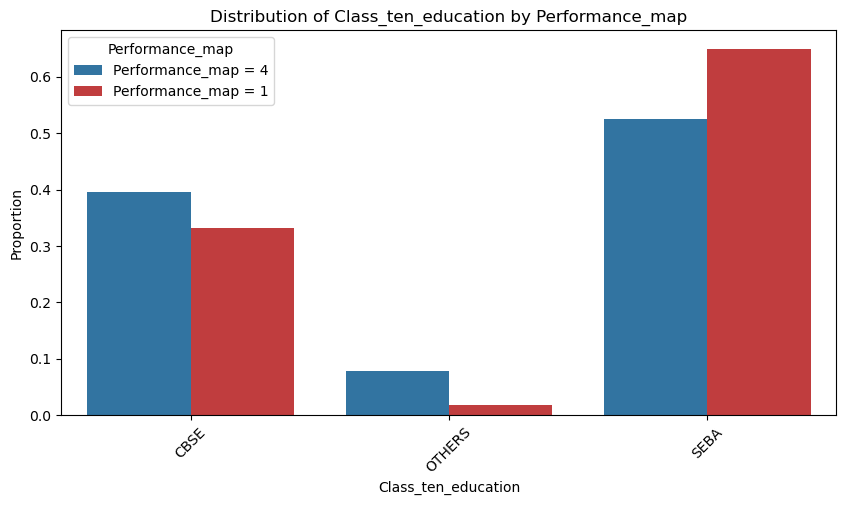

Distribution of twelve_education for Performance_map = 4:
twelve_education
CBSE      0.514851
AHSEC     0.455446
OTHERS    0.029703
Name: proportion, dtype: float64

Distribution of twelve_education for Performance_map = 1:
twelve_education
AHSEC     0.585987
CBSE      0.394904
OTHERS    0.019108
Name: proportion, dtype: float64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


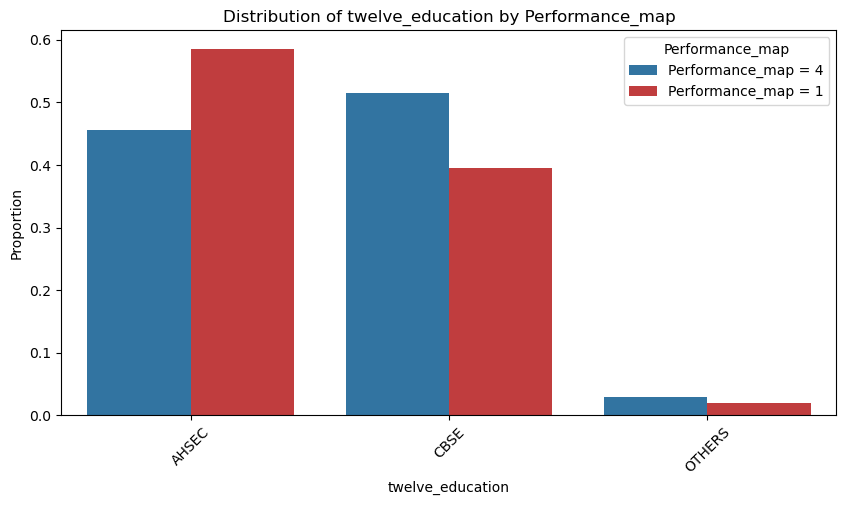

Distribution of medium for Performance_map = 4:
medium
ENGLISH     0.801980
OTHERS      0.118812
ASSAMESE    0.079208
Name: proportion, dtype: float64

Distribution of medium for Performance_map = 1:
medium
ENGLISH     0.834395
ASSAMESE    0.140127
OTHERS      0.025478
Name: proportion, dtype: float64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


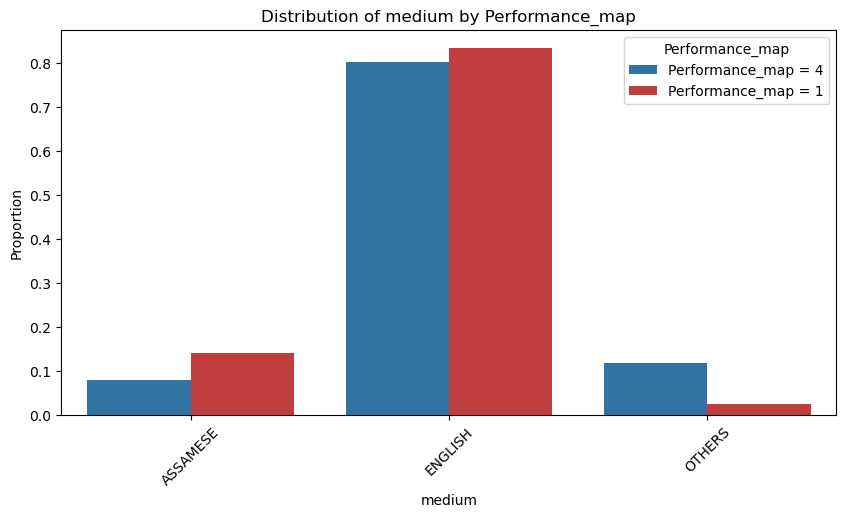

Distribution of Class_X_Percentage for Performance_map = 4:
Class_X_Percentage
Excellent    0.861386
Vg           0.059406
Good         0.059406
Average      0.019802
Name: proportion, dtype: float64

Distribution of Class_X_Percentage for Performance_map = 1:
Class_X_Percentage
Excellent    0.598726
Vg           0.242038
Good         0.108280
Average      0.050955
Name: proportion, dtype: float64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


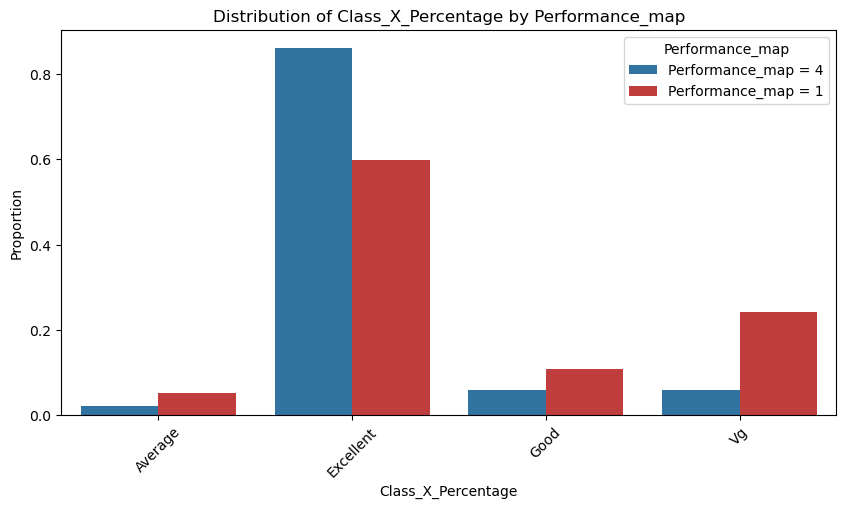

Distribution of Class_XII_Percentage for Performance_map = 4:
Class_XII_Percentage
Excellent    0.772277
Vg           0.118812
Good         0.089109
Average      0.019802
Name: proportion, dtype: float64

Distribution of Class_XII_Percentage for Performance_map = 1:
Class_XII_Percentage
Excellent    0.363057
Vg           0.363057
Good         0.235669
Average      0.038217
Name: proportion, dtype: float64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


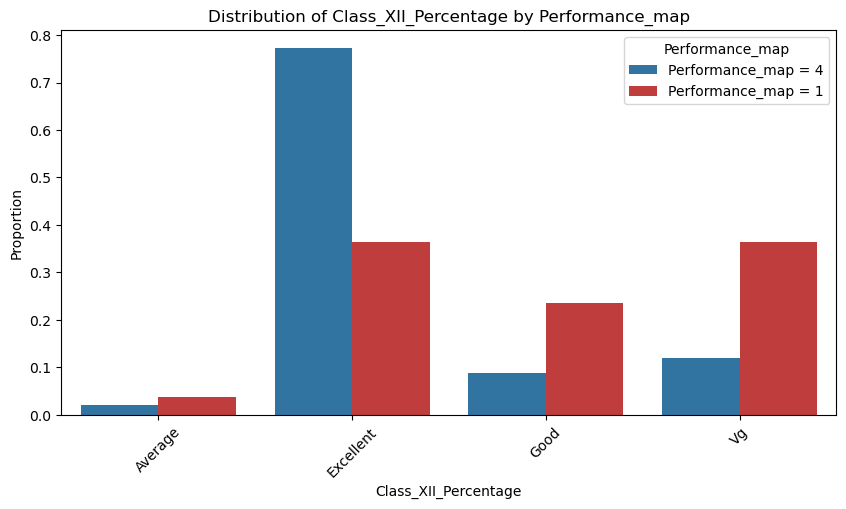

Distribution of Father_occupation for Performance_map = 4:
Father_occupation
OTHERS             0.356436
BUSINESS           0.148515
ENGINEER           0.128713
DOCTOR             0.108911
SCHOOL_TEACHER     0.108911
COLLEGE_TEACHER    0.099010
BANK_OFFICIAL      0.039604
CULTIVATOR         0.009901
Name: proportion, dtype: float64

Distribution of Father_occupation for Performance_map = 1:
Father_occupation
OTHERS             0.452229
SCHOOL_TEACHER     0.159236
BUSINESS           0.133758
CULTIVATOR         0.095541
ENGINEER           0.063694
DOCTOR             0.050955
BANK_OFFICIAL      0.038217
COLLEGE_TEACHER    0.006369
Name: proportion, dtype: float64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


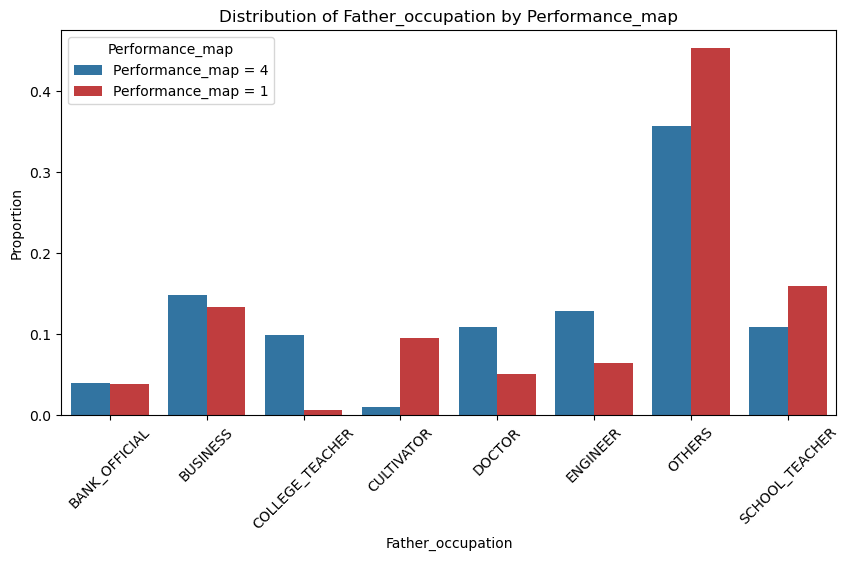

Distribution of Mother_occupation for Performance_map = 4:
Mother_occupation
HOUSE_WIFE         0.594059
SCHOOL_TEACHER     0.168317
OTHERS             0.108911
COLLEGE_TEACHER    0.089109
DOCTOR             0.029703
BANK_OFFICIAL      0.009901
Name: proportion, dtype: float64

Distribution of Mother_occupation for Performance_map = 1:
Mother_occupation
HOUSE_WIFE         0.700637
SCHOOL_TEACHER     0.140127
OTHERS             0.127389
COLLEGE_TEACHER    0.012739
DOCTOR             0.012739
BUSINESS           0.006369
Name: proportion, dtype: float64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


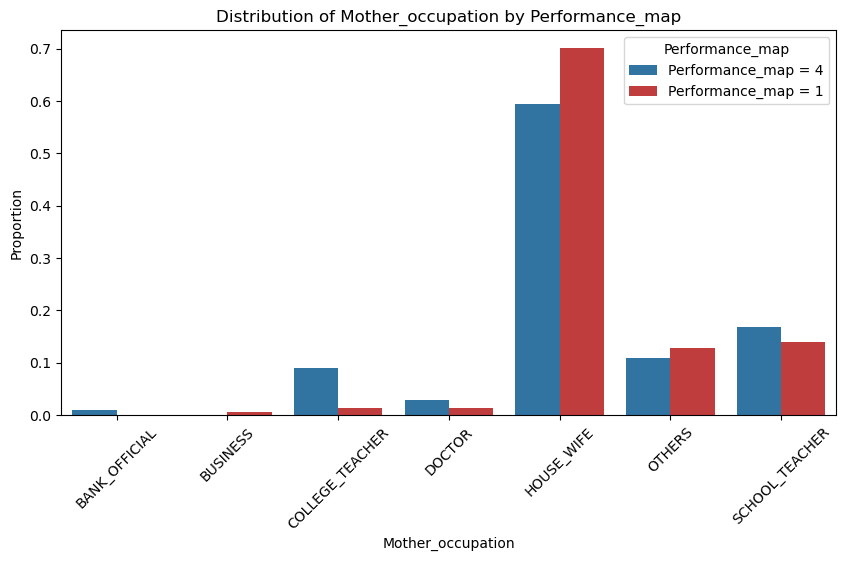

In [122]:
best_data = data[data['Performance_map'] == 4]
worst_data = data[data['Performance_map'] == 1]

categorical_columns = ['Gender', 'Caste', 'coaching', 'Class_ten_education', 'twelve_education', 
                        'medium', 'Class_X_Percentage', 'Class_XII_Percentage', 'Father_occupation', 'Mother_occupation']


for col in categorical_columns:
    
    print(f"Distribution of {col} for Performance_map = 4:")
    print(best_data[col].value_counts(normalize=True))
    print(f"\nDistribution of {col} for Performance_map = 1:")
    print(worst_data[col].value_counts(normalize=True))
    print("~"*50)
    
    
    plt.figure(figsize=(10, 5))
    
    combined_data = (
        best_data[col].value_counts(normalize=True).rename('Performance_map = 4')
        .to_frame()
        .join(
            worst_data[col].value_counts(normalize=True).rename('Performance_map = 1'),
            how='outer'
        )
        .reset_index()
        .melt(id_vars=col, var_name='Performance_map', value_name='Proportion')
    )

    sns.barplot(
        x=col, y='Proportion', hue='Performance_map', data=combined_data,
                palette={'Performance_map = 4': '#1f77b4', 'Performance_map = 1': '#d62728'}

    )
    
    plt.title(f'Distribution of {col} by Performance_map')
    plt.xticks(rotation=45)
    plt.legend(title='Performance_map')
    plt.show()

In [101]:
#OBSERVATIONS - Blue represents those who achieved the highest measured outcome, while red reprsents those achieveed the lower measured outcome (in this case 'Average')

#GENDER:  I'm going to ignore male and female, because it is something that cannot be controlled for, but the data indicate males are more likely to perform better on the entrance exams

#CASTE:  the ST caste (indigenous communities) shows zero ability to perform at the highest level on the test.  Being a member of the General caste is a much better predictor.

#COACHING:  Coaching overall has a high correlation with performance, but coaching With Assam specifically seems to indicate a neglible difference on outcome; there is little difference beween those who received an average ranking with Assam coaching and those who achieved the highest level with Assam Coaching

#CLASS_TEN_EDUCATION:  Being part of the SEBA Education Board seems to have more impact on the results, but not guaranteeing a more favorable result.

#TWELVE_EDUCATION:  The data here strongly indicate the CBSE higher education council provides a much better opporunity for achieving the highest performance metric, especially when compared to AHSEC

#MEDIUM:  There isn't enough information here to help inform as to why English is the superior medium.  Is English the primaryprimary languages spoken as well as for the test?

#CLASS_X_PERCENTAGE & #CLASS _XII_PERCENTAGE:  These only show how well students performed, which an irrelevant metric.  "Students who scored well on X scored well on Y" when we don't have enough information to distinguish between X and Y isn't helpful.

#FATHER_EDUCATION:  There doesn't seem to be any statistically significant difference for paternal profession; I'm inclined to think "OTHER" is too big of a catch-all category to appear more noteworthy than it actually is.  Perhaps grouping professions by a different metric would have been more meaningful

#MOTHER_EDUCATION:  This, again, might be case of the quantitiy of data outweighing the value of the data, but it's interesting to see how much of a difference this seems to make.

In [121]:
#LIMITATIONS

#The data does not have a 'less than average' score to compare against, so it is difficult to tell just how much of a difference was made.
#The sample size seems much smaller than would be helpful
#It is not clear how "Performance" was actually measured when collecting this data

#In my personal opinion, things are too vague to be really reliable here.  There are categories that are vague and we know literally nothing about how this information was gathered and from which source.

In [103]:
#After talking with my mentor, I'm going to see how that compares to a chi-squared analysis for all 4

In [119]:
best_data = data[data['Performance_map'] == 4]
worst_data = data[data['Performance_map'] == 1]
good_data = data[data['Performance_map'] == 2]
great_data = data[data['Performance_map'] == 3]


categorical_columns = ['Gender', 'Caste', 'coaching', 'Class_ten_education', 'twelve_education', 
                        'medium', 'Class_X_Percentage', 'Class_XII_Percentage', 'Father_occupation', 'Mother_occupation']

chi2_results = []

for col in categorical_columns:
    contingency_table = pd.crosstab(data[col], data['Performance_map'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi2_results.append({'Variable': col, 'Chi2': chi2, 'p-value': p})

chi2_df = pd.DataFrame(chi2_results)

chi2_df = chi2_df.sort_values(by='Chi2', ascending=False)

print(chi2_df)

               Variable        Chi2       p-value
1                 Caste  448.243451  6.808096e-91
7  Class_XII_Percentage   72.323384  5.324488e-12
8     Father_occupation   65.058594  2.128341e-06
9     Mother_occupation   46.022326  4.399756e-03
6    Class_X_Percentage   41.992415  3.297060e-06
2              coaching   29.088924  5.852419e-05
5                medium   26.178521  2.062220e-04
3   Class_ten_education   14.025818  2.934909e-02
4      twelve_education    9.226198  1.612508e-01
0                Gender    4.946830  1.757322e-01


In [120]:
#OKAY, so it looks like I'm getting much different information from a Chi-squared analysis!
#High chi-value means stronger association, and pvalues above .05 indicate statistical significance

#In terms of Chi values, I sorted them in order.  It doesn't look anything new.

#In terms of statistical significance, these are the best results:
    #Gender: Chi2 = 4.95, p-value = 0.1757
    #Class_ten_education: Chi2 = 14.03, p-value = 0.0293
    #twelve_education: Chi2 = 9.23, p-value = 0.1613


In [ ]:
#Just for the fun of it, here's the plots of all 4 side-by-side:

Distribution of Gender for Performance_map = 4:
Gender
male      0.633663
female    0.366337
Name: proportion, dtype: float64

Distribution of Gender for Performance_map = 3:
Gender
male      0.510101
female    0.489899
Name: proportion, dtype: float64

Distribution of Gender for Performance_map = 2:
Gender
male      0.52381
female    0.47619
Name: proportion, dtype: float64

Distribution of Gender for Performance_map = 1:
Gender
male      0.509554
female    0.490446
Name: proportion, dtype: float64


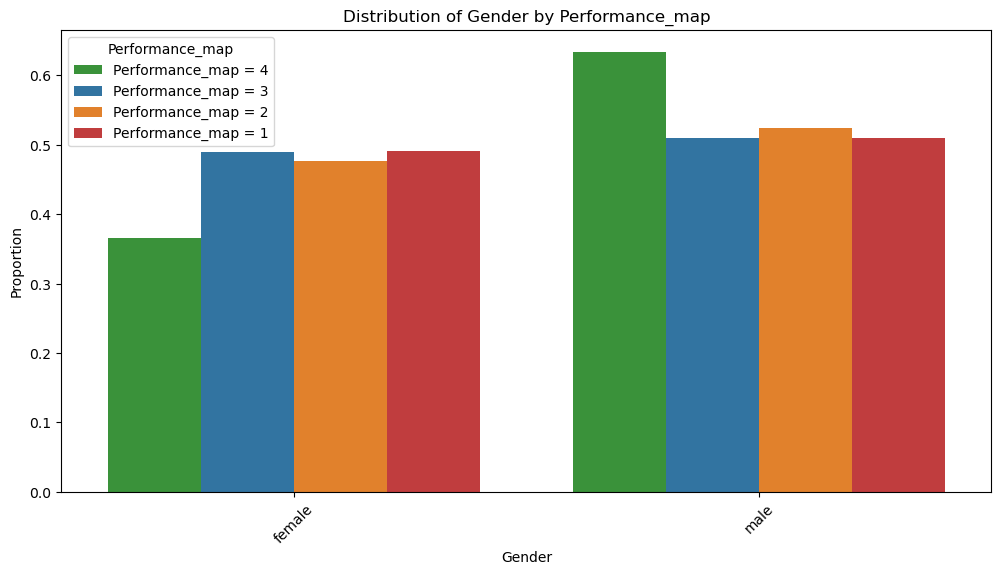

Distribution of Caste for Performance_map = 4:
Caste
General    0.821782
OBC        0.148515
SC         0.029703
Name: proportion, dtype: float64

Distribution of Caste for Performance_map = 3:
Caste
General    0.681818
OBC        0.247475
SC         0.060606
ST         0.010101
Name: proportion, dtype: float64

Distribution of Caste for Performance_map = 2:
Caste
General    0.528571
OBC        0.347619
SC         0.100000
ST         0.023810
Name: proportion, dtype: float64

Distribution of Caste for Performance_map = 1:
Caste
ST     0.643312
SC     0.197452
OBC    0.159236
Name: proportion, dtype: float64


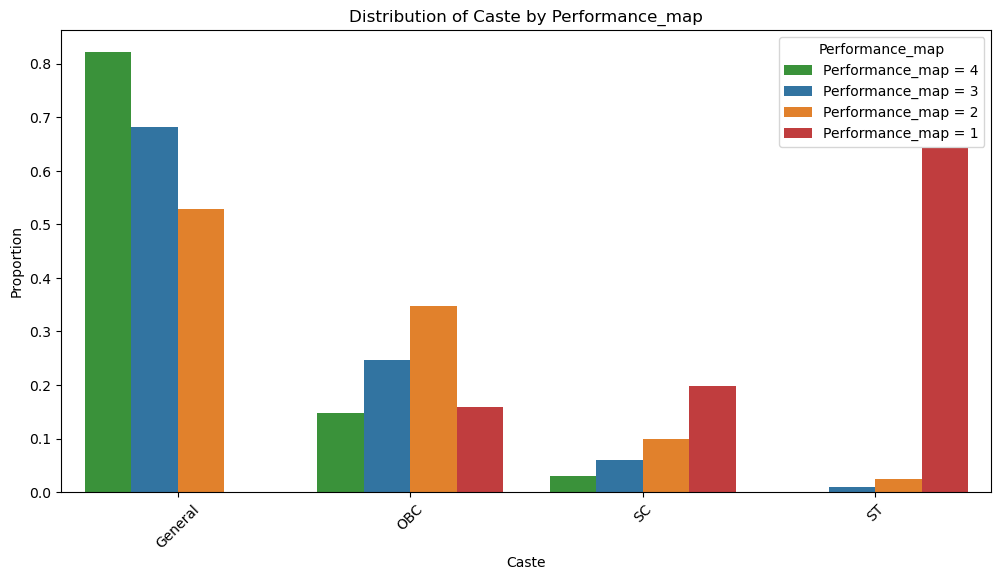

Distribution of coaching for Performance_map = 4:
coaching
WA    0.564356
OA    0.237624
NO    0.198020
Name: proportion, dtype: float64

Distribution of coaching for Performance_map = 3:
coaching
WA    0.737374
NO    0.191919
OA    0.070707
Name: proportion, dtype: float64

Distribution of coaching for Performance_map = 2:
coaching
WA    0.657143
NO    0.247619
OA    0.095238
Name: proportion, dtype: float64

Distribution of coaching for Performance_map = 1:
coaching
WA    0.687898
NO    0.254777
OA    0.057325
Name: proportion, dtype: float64


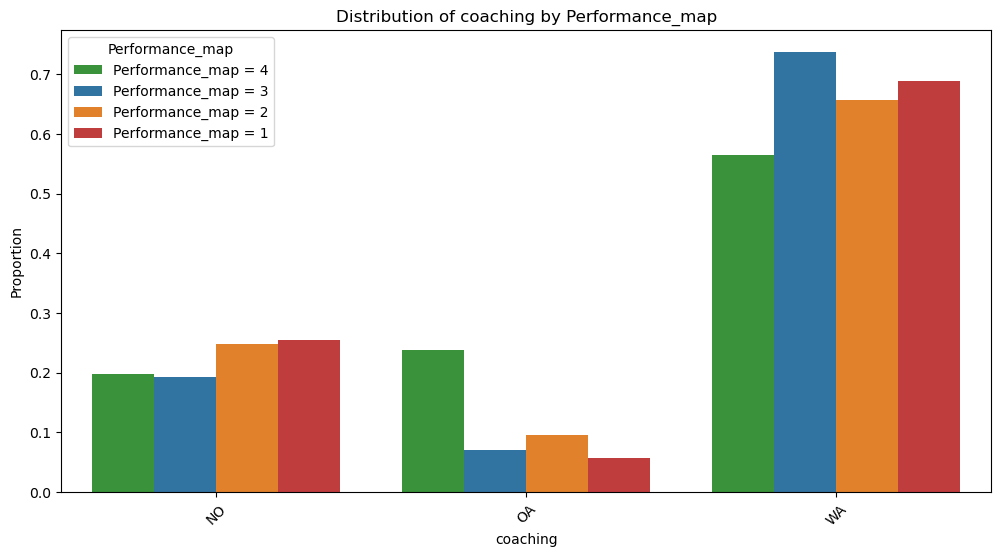

Distribution of Class_ten_education for Performance_map = 4:
Class_ten_education
SEBA      0.524752
CBSE      0.396040
OTHERS    0.079208
Name: proportion, dtype: float64

Distribution of Class_ten_education for Performance_map = 3:
Class_ten_education
SEBA      0.550505
CBSE      0.419192
OTHERS    0.030303
Name: proportion, dtype: float64

Distribution of Class_ten_education for Performance_map = 2:
Class_ten_education
SEBA      0.628571
CBSE      0.352381
OTHERS    0.019048
Name: proportion, dtype: float64

Distribution of Class_ten_education for Performance_map = 1:
Class_ten_education
SEBA      0.649682
CBSE      0.331210
OTHERS    0.019108
Name: proportion, dtype: float64


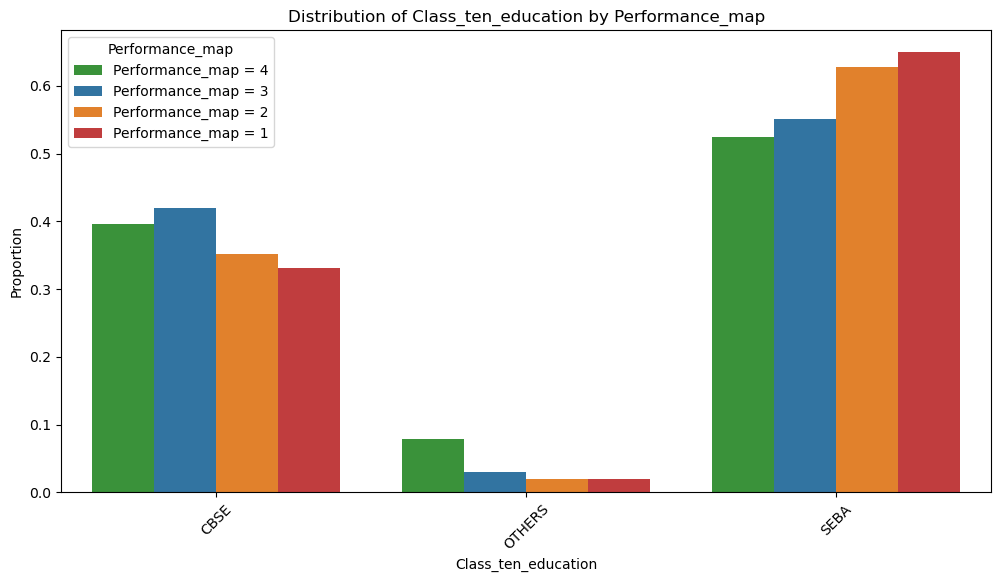

Distribution of twelve_education for Performance_map = 4:
twelve_education
CBSE      0.514851
AHSEC     0.455446
OTHERS    0.029703
Name: proportion, dtype: float64

Distribution of twelve_education for Performance_map = 3:
twelve_education
AHSEC     0.560606
CBSE      0.434343
OTHERS    0.005051
Name: proportion, dtype: float64

Distribution of twelve_education for Performance_map = 2:
twelve_education
AHSEC     0.566667
CBSE      0.428571
OTHERS    0.004762
Name: proportion, dtype: float64

Distribution of twelve_education for Performance_map = 1:
twelve_education
AHSEC     0.585987
CBSE      0.394904
OTHERS    0.019108
Name: proportion, dtype: float64


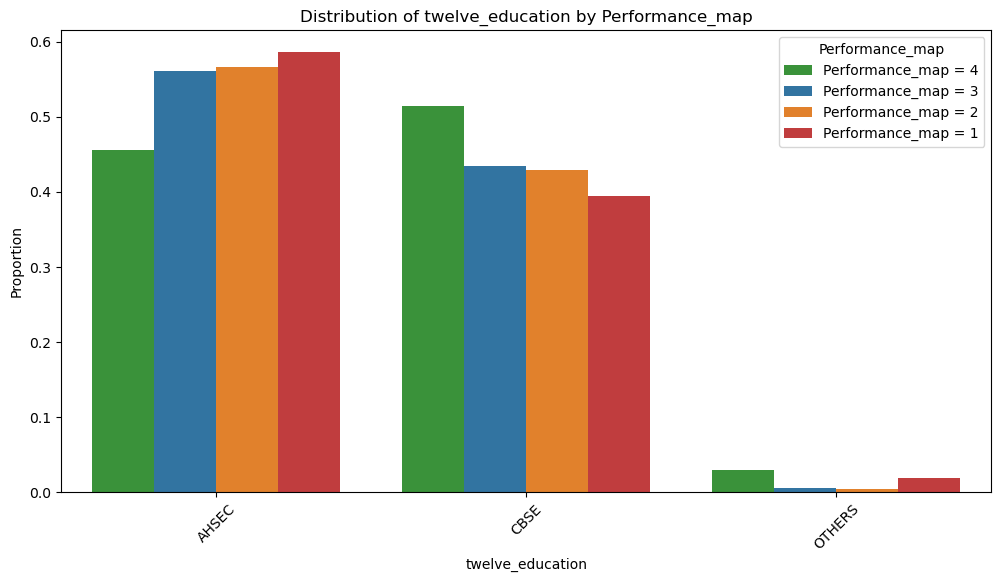

Distribution of medium for Performance_map = 4:
medium
ENGLISH     0.801980
OTHERS      0.118812
ASSAMESE    0.079208
Name: proportion, dtype: float64

Distribution of medium for Performance_map = 3:
medium
ENGLISH     0.823232
OTHERS      0.141414
ASSAMESE    0.035354
Name: proportion, dtype: float64

Distribution of medium for Performance_map = 2:
medium
ENGLISH     0.766667
OTHERS      0.142857
ASSAMESE    0.090476
Name: proportion, dtype: float64

Distribution of medium for Performance_map = 1:
medium
ENGLISH     0.834395
ASSAMESE    0.140127
OTHERS      0.025478
Name: proportion, dtype: float64


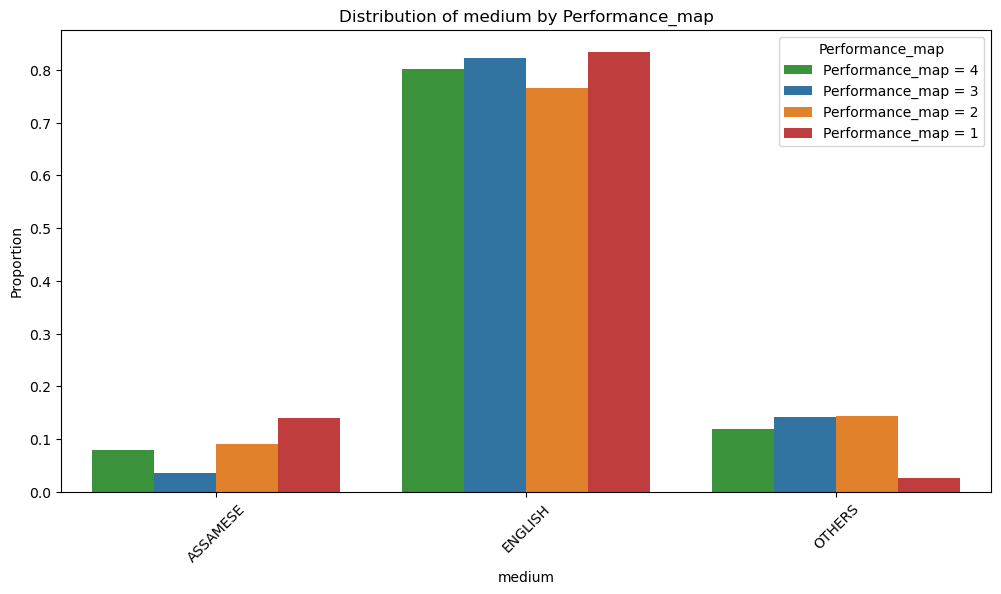

Distribution of Class_X_Percentage for Performance_map = 4:
Class_X_Percentage
Excellent    0.861386
Vg           0.059406
Good         0.059406
Average      0.019802
Name: proportion, dtype: float64

Distribution of Class_X_Percentage for Performance_map = 3:
Class_X_Percentage
Excellent    0.828283
Vg           0.131313
Good         0.035354
Average      0.005051
Name: proportion, dtype: float64

Distribution of Class_X_Percentage for Performance_map = 2:
Class_X_Percentage
Excellent    0.790476
Vg           0.147619
Good         0.052381
Average      0.009524
Name: proportion, dtype: float64

Distribution of Class_X_Percentage for Performance_map = 1:
Class_X_Percentage
Excellent    0.598726
Vg           0.242038
Good         0.108280
Average      0.050955
Name: proportion, dtype: float64


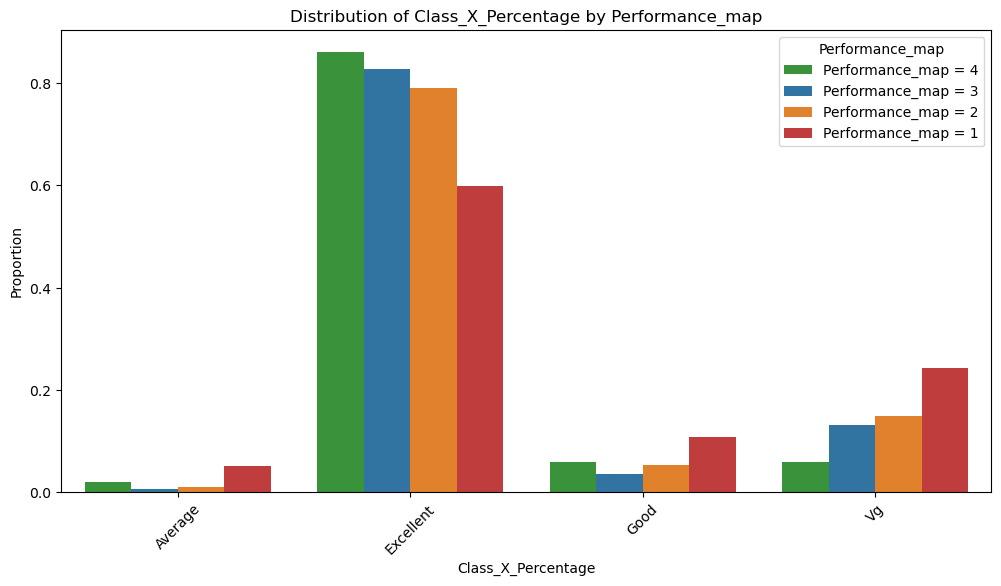

Distribution of Class_XII_Percentage for Performance_map = 4:
Class_XII_Percentage
Excellent    0.772277
Vg           0.118812
Good         0.089109
Average      0.019802
Name: proportion, dtype: float64

Distribution of Class_XII_Percentage for Performance_map = 3:
Class_XII_Percentage
Excellent    0.696970
Vg           0.247475
Good         0.050505
Average      0.005051
Name: proportion, dtype: float64

Distribution of Class_XII_Percentage for Performance_map = 2:
Class_XII_Percentage
Excellent    0.595238
Vg           0.300000
Good         0.090476
Average      0.014286
Name: proportion, dtype: float64

Distribution of Class_XII_Percentage for Performance_map = 1:
Class_XII_Percentage
Excellent    0.363057
Vg           0.363057
Good         0.235669
Average      0.038217
Name: proportion, dtype: float64


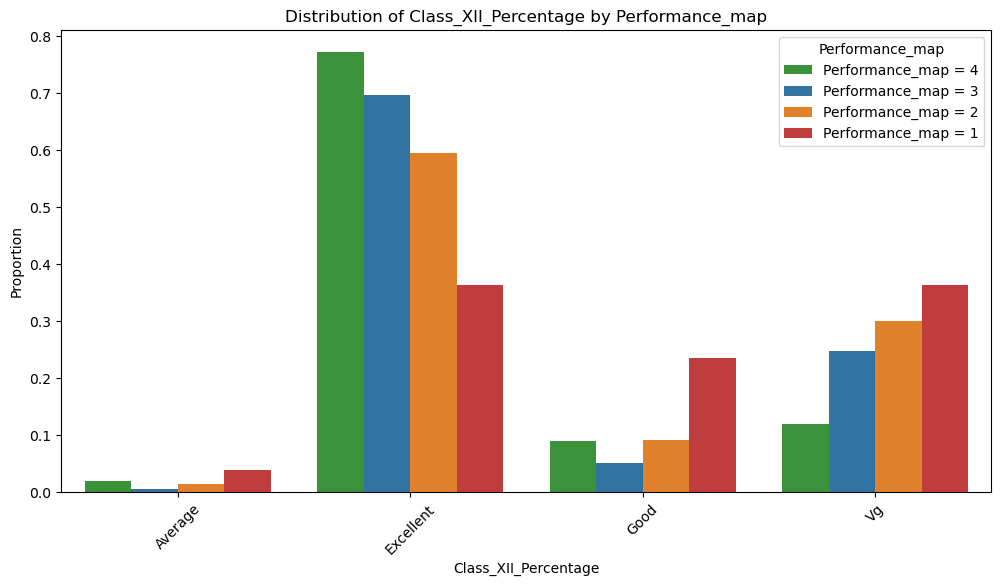

Distribution of Father_occupation for Performance_map = 4:
Father_occupation
OTHERS             0.356436
BUSINESS           0.148515
ENGINEER           0.128713
DOCTOR             0.108911
SCHOOL_TEACHER     0.108911
COLLEGE_TEACHER    0.099010
BANK_OFFICIAL      0.039604
CULTIVATOR         0.009901
Name: proportion, dtype: float64

Distribution of Father_occupation for Performance_map = 3:
Father_occupation
OTHERS             0.419192
BUSINESS           0.151515
SCHOOL_TEACHER     0.141414
ENGINEER           0.080808
COLLEGE_TEACHER    0.070707
DOCTOR             0.065657
BANK_OFFICIAL      0.045455
CULTIVATOR         0.025253
Name: proportion, dtype: float64

Distribution of Father_occupation for Performance_map = 2:
Father_occupation
OTHERS             0.414286
SCHOOL_TEACHER     0.214286
BUSINESS           0.176190
DOCTOR             0.109524
ENGINEER           0.028571
CULTIVATOR         0.028571
BANK_OFFICIAL      0.019048
COLLEGE_TEACHER    0.009524
Name: proportion, dtype: floa

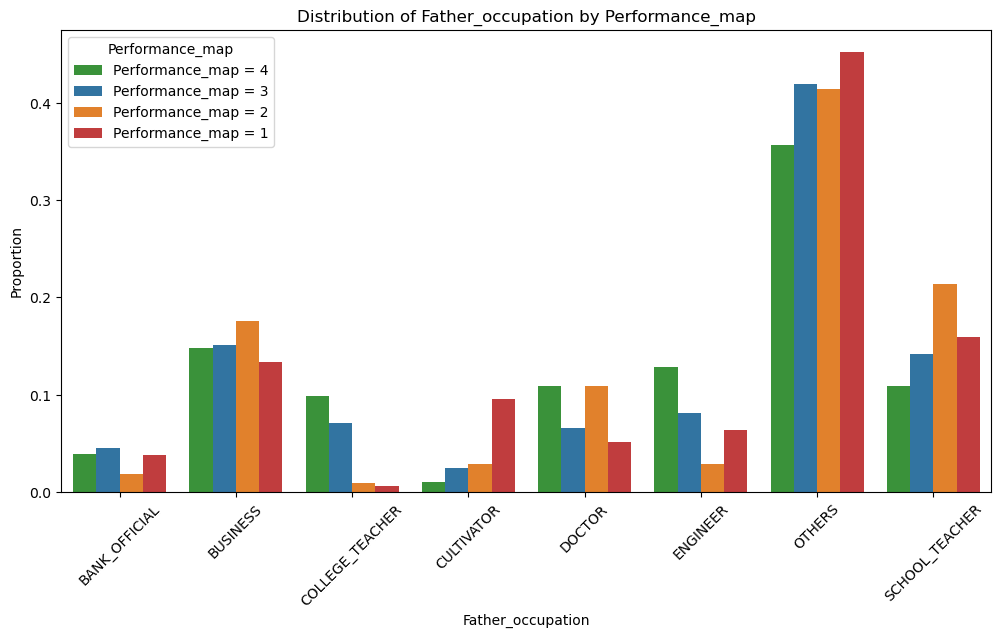

Distribution of Mother_occupation for Performance_map = 4:
Mother_occupation
HOUSE_WIFE         0.594059
SCHOOL_TEACHER     0.168317
OTHERS             0.108911
COLLEGE_TEACHER    0.089109
DOCTOR             0.029703
BANK_OFFICIAL      0.009901
Name: proportion, dtype: float64

Distribution of Mother_occupation for Performance_map = 3:
Mother_occupation
HOUSE_WIFE         0.666667
SCHOOL_TEACHER     0.146465
OTHERS             0.070707
COLLEGE_TEACHER    0.040404
DOCTOR             0.030303
BANK_OFFICIAL      0.015152
ENGINEER           0.015152
BUSINESS           0.010101
CULTIVATOR         0.005051
Name: proportion, dtype: float64

Distribution of Mother_occupation for Performance_map = 2:
Mother_occupation
HOUSE_WIFE         0.666667
SCHOOL_TEACHER     0.190476
OTHERS             0.128571
DOCTOR             0.009524
COLLEGE_TEACHER    0.004762
Name: proportion, dtype: float64

Distribution of Mother_occupation for Performance_map = 1:
Mother_occupation
HOUSE_WIFE         0.700637
SC

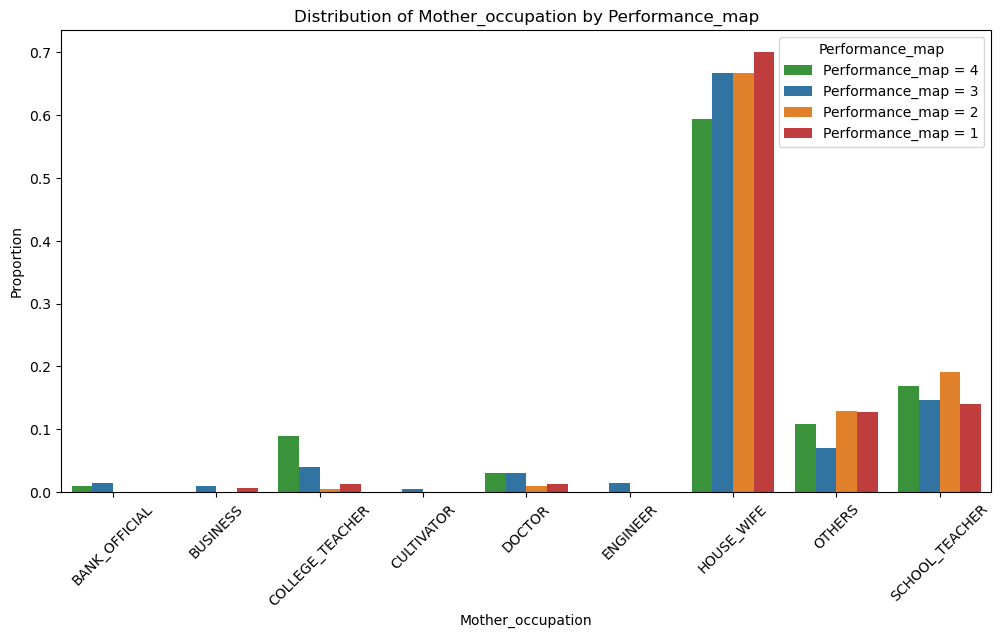

In [118]:
best_data = data[data['Performance_map'] == 4]
worst_data = data[data['Performance_map'] == 1]
great_data = data[data['Performance_map'] == 3]
good_data = data[data['Performance_map'] == 2]

categorical_columns = ['Gender', 'Caste', 'coaching', 'Class_ten_education', 'twelve_education', 
                       'medium', 'Class_X_Percentage', 'Class_XII_Percentage', 'Father_occupation', 'Mother_occupation']

for col in categorical_columns:
    
    print(f"Distribution of {col} for Performance_map = 4:")
    print(best_data[col].value_counts(normalize=True))
    print(f"\nDistribution of {col} for Performance_map = 3:")
    print(great_data[col].value_counts(normalize=True))
    print(f"\nDistribution of {col} for Performance_map = 2:")
    print(good_data[col].value_counts(normalize=True))
    print(f"\nDistribution of {col} for Performance_map = 1:")
    print(worst_data[col].value_counts(normalize=True))
    print("="*50)
    

    combined_data = (
        best_data[col].value_counts(normalize=True).rename('Performance_map = 4')
        .to_frame()
        .join(great_data[col].value_counts(normalize=True).rename('Performance_map = 3'), how='outer')
        .join(good_data[col].value_counts(normalize=True).rename('Performance_map = 2'), how='outer')
        .join(worst_data[col].value_counts(normalize=True).rename('Performance_map = 1'), how='outer')
        .reset_index()
        .melt(id_vars=col, var_name='Performance_map', value_name='Proportion')
    )


    plt.figure(figsize=(12, 6))
    sns.barplot(
        x=col, y='Proportion', hue='Performance_map', data=combined_data,
        palette={
            'Performance_map = 4': '#2ca02c',  # Green for best
            'Performance_map = 3': '#1f77b4',  # Blue for great
            'Performance_map = 2': '#ff7f0e',  # Orange for good
            'Performance_map = 1': '#d62728'   # Red for worst
        }
    )
    

    plt.title(f'Distribution of {col} by Performance_map')
    plt.xticks(rotation=45)
    plt.legend(title='Performance_map')
    plt.show()